### Flavors of Cacao Rating System:
- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)

`Import library`

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

`Read data`

In [50]:
#Read file
dataset = pd.read_csv("flavors_of_cacao.csv")
#Assigns a list of the current column names in the dataset
original_cols = dataset.columns
#Defines a list of new column names that we want to assign to the columns in the dataset
new_cols = ['company', 'species', 'REF', 'review_year', 'cocoa_percentage',
                'company_location', 'rating', 'bean_type', 'country']
#Change the column names
dataset = dataset.rename(columns=dict(zip(original_cols, new_cols)))
# dataset.head()
dataset.sample(10)

,company,species,REF,review_year,cocoa_percentage,company_location,rating,bean_type,country
1363,Ranger,"Chulucanas, Batch 1",1562,2015,80%,U.S.A.,3.25,,Peru
12,A. Morin,Brazil,1011,2013,70%,France,3.25,,Brazil
422,Chocovivo,Tabasco,1522,2015,65%,U.S.A.,2.50,Trinitario,Mexico
781,Hacienda El Castillo,Don Homero- Cerecita Valley,1327,2014,55%,Ecuador,2.75,Trinitario,Ecuador
1494,Snake & Butterfly,Ecuador,502,2010,68%,U.S.A.,3.25,,Ecuador
174,Belyzium,Belize south,1768,2016,78%,Germany,3.00,Trinitario,Belize
471,Cravve,Vanuatu,975,2012,64%,Australia,3.25,Trinitario,Vanuatu
317,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
837,Hotel Chocolat (Coppeneur),Sambirano,809,2012,66%,U.K.,3.50,"Trinitario, Criollo",Madagascar
822,Holy Cacao,Hispaniola,431,2009,70%,Israel,2.75,,Dominican Republic


Get some info about our dataset.

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1795 non-null   object 
 1   species           1795 non-null   object 
 2   REF               1795 non-null   int64  
 3   review_year       1795 non-null   int64  
 4   cocoa_percentage  1795 non-null   object 
 5   company_location  1795 non-null   object 
 6   rating            1795 non-null   float64
 7   bean_type         1794 non-null   object 
 8   country           1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


`Clean Data`

Here we can see that there aren't many null values in out dataset.
But in this sample we can see that there are a lot of blanks in the `Bean Type` column.

In [52]:
dataset['bean_type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

We have two options here:
1. Fill all of the null values with the mode value (`Trinitario`)
2. Drop the column

Method 1:

In [53]:
dataset['bean_type'] = dataset['bean_type'].fillna('Trinitario')

In [54]:
dataset['bean_type'].value_counts()

                            887
Trinitario                  420
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

Fail after using method 1 so i decide to use method 2 instead

In [55]:
dataset.drop(['bean_type'], axis=1, inplace=True)

In [56]:
dataset.sample(10)

,company,species,REF,review_year,cocoa_percentage,company_location,rating,country
900,Ki' Xocolatl,Dark,431,2009,72%,Mexico,2.00,Mexico
470,Cravve,"Namau Village, N. Taileva P., batch a2812",975,2012,67%,Australia,3.25,Fiji
857,Idilio (Felchlin),Coopertiva Amazona,725,2011,72%,Switzerland,3.75,Venezuela
1482,"Smooth Chocolator, The","Chimelb, Lanquin, Alta Verapaz, b-GUA001",1908,2016,70%,Australia,3.25,Guatemala
476,Daintree,"Daintree Estates, N. Queensland",785,2011,70%,Australia,3.25,Australia
25,Adi,Vanua Levu,705,2011,60%,Fiji,2.75,Fiji
1364,Ranger,"Tumbes, Batch 2",1562,2015,73%,U.S.A.,3.50,Peru
646,Felchlin,"Madagascar, Grand Cru",48,2006,64%,Switzerland,3.00,Madagascar
468,Cravve,"Tanzania, batch a1",971,2012,75%,Australia,3.25,Tanzania
730,Georgia Ramon,Conacado Coop,1646,2015,70%,Germany,3.50,Domincan Republic


Same with `company` column and also
drop the `REF` column as it is of no use to the project

In [57]:
dataset.drop(['REF'], axis=1, inplace=True)
dataset.drop(['company'], axis=1, inplace=True)
dataset.sample(10)

,species,review_year,cocoa_percentage,company_location,rating,country
899,"La Red, Project Reserva, Guaconejo",2013,70%,U.S.A.,3.75,Dominican Republic
227,Cuba,2011,75%,France,3.50,Cuba
276,Belize,2014,72%,U.S.A.,3.25,Belize
1460,"Trintade, Sao Tome",2011,65%,Italy,3.25,Sao Tome
1688,Tainori,2009,64%,France,3.75,Dominican Republic
218,Zorzal Reserva,2016,75%,U.S.A.,3.00,Dominican Republic
1079,Papua New Guinea,2011,71%,U.S.A.,2.75,Papua New Guinea
634,Red Vanilla,2011,62%,U.S.A.,2.75,
1659,"Ghana, Panama, Ecuador",2007,75%,U.S.A.,3.00,"Ghana, Panama, Ecuador"
1272,Signature Blend,2011,70%,U.S.A.,3.75,


Change percent into a numeric value.

In [58]:
dataset['cocoa_percentage']= dataset['cocoa_percentage'].str.replace('%','').astype(float)
dataset.sample(10)

,species,review_year,cocoa_percentage,company_location,rating,country
302,Arauca,2014,70.0,Colombia,3.25,Colombia
822,Hispaniola,2009,70.0,Israel,2.75,Dominican Republic
1104,Honduras,2014,80.0,Honduras,3.25,Honduras
1315,"Porcelana, S. of Lake Maracaibo",2011,75.0,France,3.25,Venezuela
1125,Kokoa Kamili,2015,75.0,U.S.A.,3.25,Tanzania
1472,"Somia Plantation, 2012",2014,73.0,Canada,3.75,Madagascar
455,Trinidad,2010,72.0,Germany,3.00,Trinidad
1052,"Tan Phu Dong, Treasure Island",2013,75.0,Vietnam,3.50,Vietnam
1065,Alto Beni,2016,76.0,Austria,2.75,Bolivia
219,Guatemala,2012,70.0,U.S.A.,3.50,Guatemala


We can classify the chocolates into `Dark`, `Normal` and `White` chocolates based on column `cocoa_percentage`.

In [59]:
dataset['cocoa_type'] = dataset['cocoa_percentage'].apply(lambda x: 'dark' if x>=70 else 'normal' if x>0 else 'white')
dataset['cocoa_type'].value_counts()

dark      1467
normal     328
Name: cocoa_type, dtype: int64

In [60]:
dataset.sample(5)

,species,review_year,cocoa_percentage,company_location,rating,country,cocoa_type
1257,Kokoa Kamili,2015,72.0,Canada,3.50,Tanzania,dark
1576,Hispaniola,2015,70.0,U.S.A.,3.00,Domincan Republic,dark
549,"Panama, Raven",2014,72.0,U.K.,3.25,Panama,dark
1206,"PNG, Devotion",2014,66.0,New Zealand,2.75,Papua New Guinea,normal
89,"Monte Alegre, 3 diff. plantations",2010,85.0,Brazil,2.75,Brazil,dark


`EDA`

Types of chocolates reviewed

<Axes: xlabel='cocoa_type', ylabel='count'>

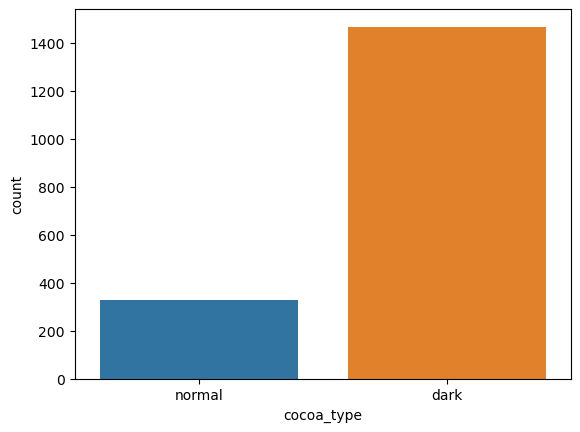

In [61]:
sns.countplot(x='cocoa_type', data=dataset)


<Axes: xlabel='cocoa_percentage', ylabel='rating'>

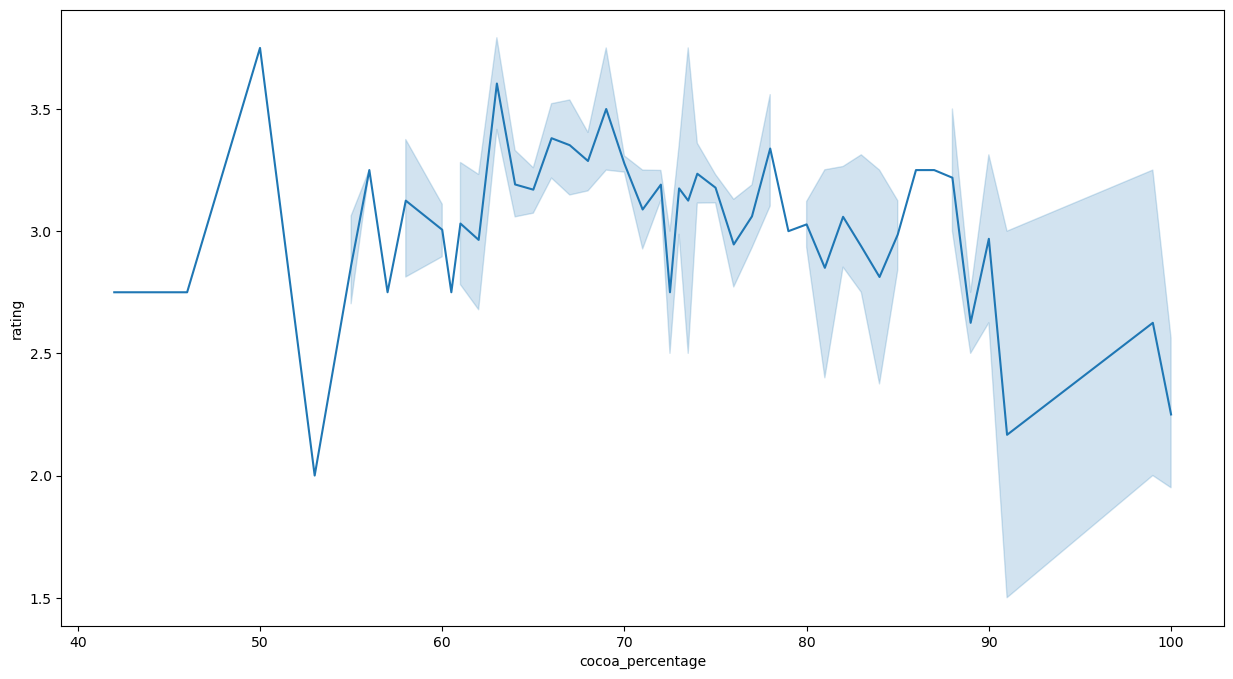

In [62]:
plt.figure(figsize=(15,8))
sns.lineplot(x='cocoa_percentage', y='rating', data=dataset)

According to this plot, we can see majority of the people do not like the extreme types of chocolate (i.e. too dark or too light). The average is around 60%-70%. 

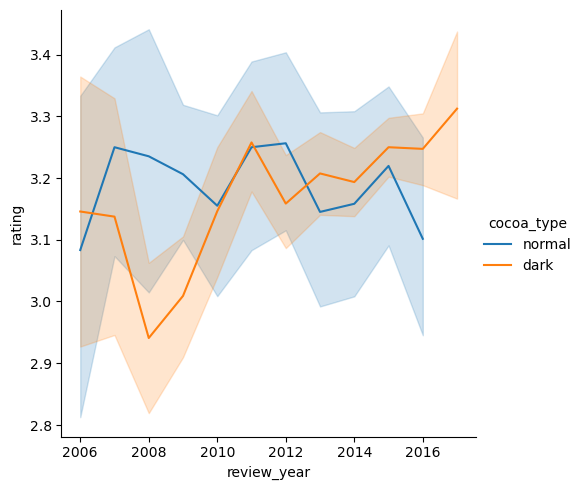

In [63]:
sns.relplot(x="review_year", y="rating", hue="cocoa_type", kind="line", data=dataset);

Here we can see, the liking for dark chocolates have increased over the years whereas for the other, it's the same.

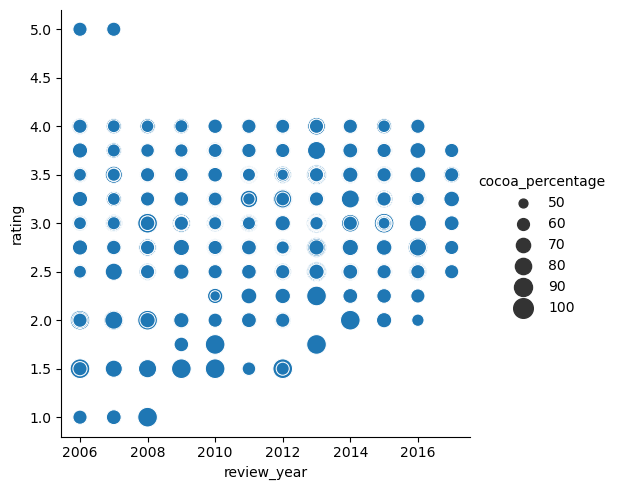

In [64]:
sns.relplot(x="review_year", y="rating", size="cocoa_percentage", sizes=(15, 200), data=dataset);

The heavier dots are the bottom of the rating chart for almost all of the years

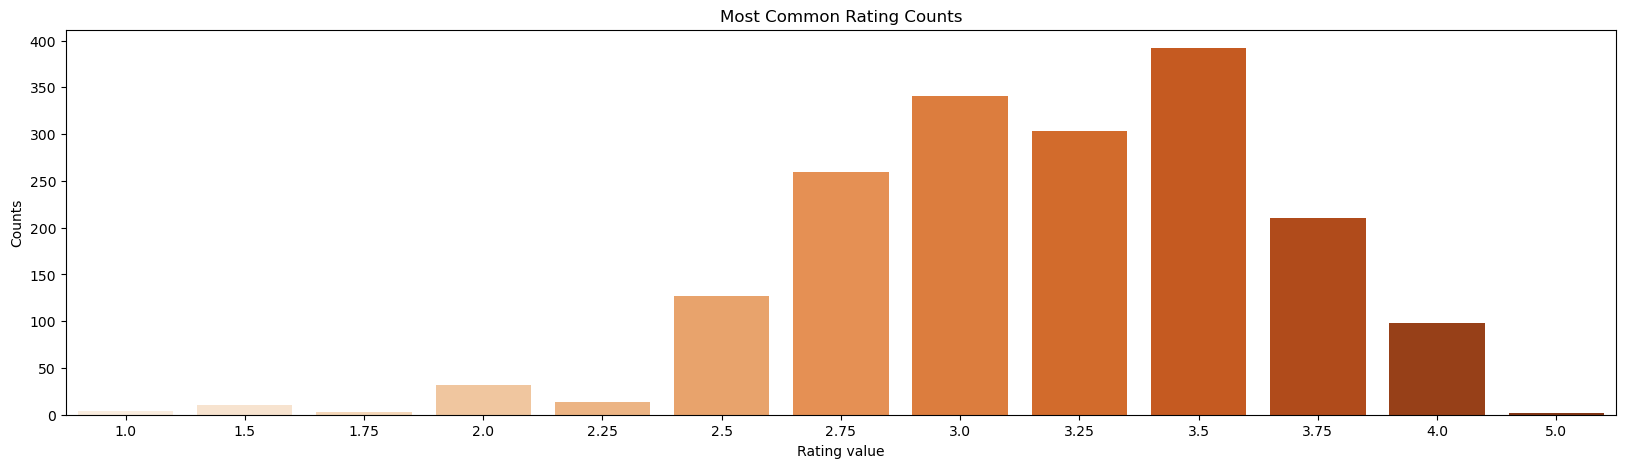

In [65]:
rating_counts = dataset.rating.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Oranges")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Most Common Rating Counts")
plt.show()

Thus, we see that Rating value **3.5** is the most common, conveying that most of the chocolates lie in the range between **Satisfactory and Premium**.

In [66]:
fig = px.pie(dataset.head(100),names='country',title='Countries')
fig.show()

In [67]:
# flow = pd.crosstab(choco['company_location'],choco['country'])
# flow['total'] = flow.sum(axis=1)
# flow = flow.sort_values('total', ascending=False)
# flow = flow.drop('total', axis=1)

# fig, ax = plt.subplots(figsize=[20,5])
# sns.heatmap(flow.head(10), cmap='Greens', linewidths=1)
# ax.set_title('Goods Flow from Origin to Company Location')

In [68]:
# flow = pd.crosstab(
#     choco['company_location'],
#     choco['review_year'],
#     choco['rating'], aggfunc='mean'
# )
# flow['total'] = flow.sum(axis=1)
# flow = flow.sort_values('total', ascending=False)
# flow = flow.drop('total', axis=1)
# fig, ax = plt.subplots(figsize=[20,10])
# sns.heatmap(flow.head(20), cmap='magma', linewidths=1)
# ax.set_title('Goods Flow from Company Location, Rating over the years')

In [69]:
# flow = flow.T
# fig, ax = plt.subplots(figsize=[20,10])
# for c in choco['company_location'].value_counts().head(5).index:
#     ax.plot(flow.index, flow[c], label=c)
# ax.legend(ncol=1, loc=4)
# ax.set_title('Timeline of Cocoa Rating by Company location')
# plt.show()